Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 1, 46)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 1, 128)    │      6,016 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 1, 64)     │      8,256 │ conv1d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 1, 64)     │          0 │ conv1d_1[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 1, 128)    │     89,600 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 1, 64)     │          0 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 64)        │     49,408 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 64)        │          0 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 128)       │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │     33,024 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 256)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     32,896 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 128)       │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 8)         │      1,032 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 220,232 (860.28 KB)

 Trainable params: 220,232 (860.28 KB)

 Non-trainable params: 0 (0.00 B)


--- Training the Improved CNN-LSTM Hybrid Model ---
Epoch 1/50
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5927 - loss: 0.9796 - val_accuracy: 0.6938 - val_loss: 0.7186 - learning_rate: 0.0010
Epoch 2/50
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6933 - loss: 0.7381 - val_accuracy: 0.7069 - val_loss: 0.6870 - learning_rate: 0.0010
Epoch 3/50
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7068 - loss: 0.7076 - val_accuracy: 0.7239 - val_loss: 0.6638 - learning_rate: 0.0010
Epoch 4/50
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7149 - loss: 0.6845 - val_accuracy: 0.7291 - val_loss: 0.6494 - learning_rate: 0.0010
Epoch 5/50
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7212 - loss: 0.6708 - val_accuracy: 0.7230 - val_loss: 0.6577 - learning_rate: 0.0010
Epoch 6/50
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7251 - loss: 0.6639 - val_accuracy: 0.7378 - val_loss: 0.6317 - learning_rate: 0.0010
Epoch 7/50
2700/2700

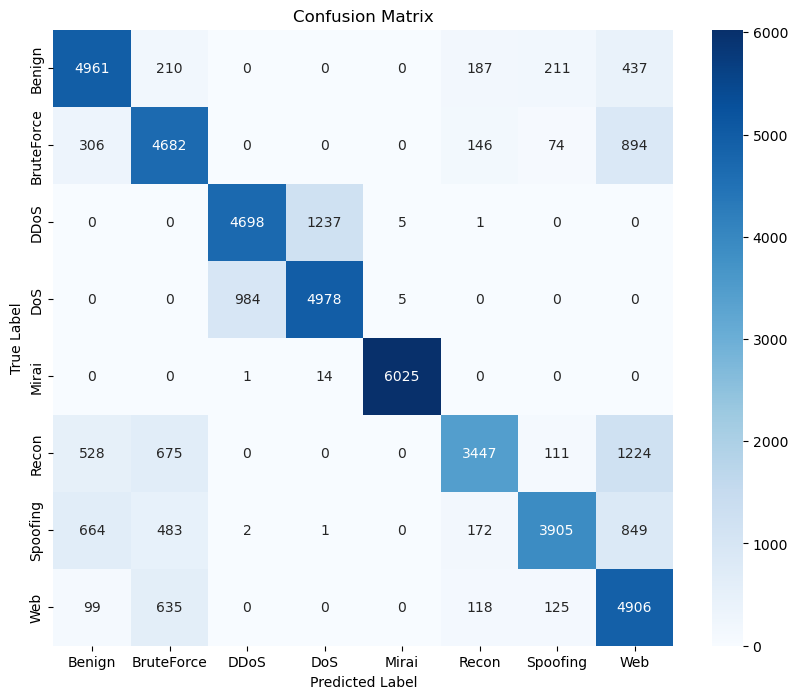


--- ROC Curve ---


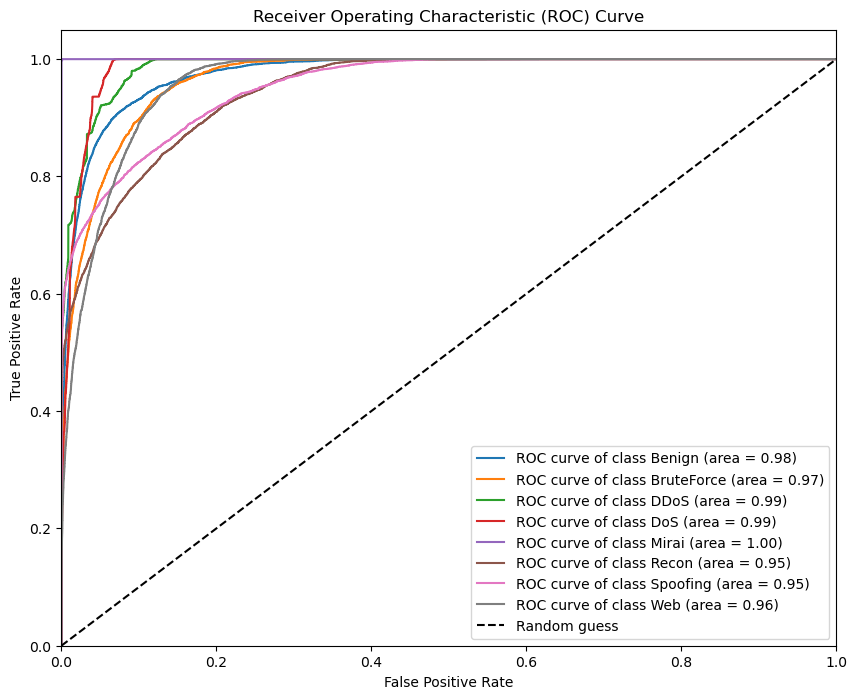

In [ ]:

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Dropout, concatenate
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load and Preprocess Data ---

try:
    data = pd.read_csv( "/Users/bodapati/Downloads/balanced_dataset3.csv")
except FileNotFoundError:
    print("Error: The CSV file was not found. Please ensure 'balanced_dataset3.csv' is in the correct directory.")
    exit()

features = ['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'Drate',
            'fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
            'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'urg_count',
            'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP',
            'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT',
            'Number', 'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight']
target = 'label'

X = data[features]
y = data[target]

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_reshaped = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_categorical, test_size=0.2, random_state=42)

# --- 2. Build and Compile the Model (Same as before) ---
input_shape = (X_train.shape[1], X_train.shape[2])
inputs = Input(shape=input_shape)

cnn_branch = Conv1D(filters=128, kernel_size=1, activation='relu')(inputs)
cnn_branch = Conv1D(filters=64, kernel_size=1, activation='relu')(cnn_branch)
cnn_branch = MaxPooling1D(pool_size=1)(cnn_branch)
cnn_branch = Dropout(0.3)(cnn_branch)
cnn_branch = Flatten()(cnn_branch)

lstm_branch = LSTM(128, activation='relu', return_sequences=True)(inputs)
lstm_branch = LSTM(64, activation='relu')(lstm_branch)
lstm_branch = Dropout(0.3)(lstm_branch)

merged_layers = concatenate([cnn_branch, lstm_branch])

dense_1 = Dense(256, activation='relu')(merged_layers)
dense_1 = Dropout(0.4)(dense_1)
dense_2 = Dense(128, activation='relu')(dense_1)
dense_2 = Dropout(0.4)(dense_2)

output_layer = Dense(y_categorical.shape[1], activation='softmax')(dense_2)

model = Model(inputs=inputs, outputs=output_layer)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# --- 3. Train the Model ---
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

print("\n--- Training the Improved CNN-LSTM Hybrid Model ---")
model.fit(X_train, y_train,
          epochs=50,
          batch_size=64,
          validation_split=0.1,
          callbacks=[reduce_lr, early_stopping],
          verbose=1)

# --- 4. Evaluate the Model and Generate Reports ---

print("\n--- Evaluating the Model on the Test Set ---")
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')

# Make predictions on the test set
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Get the class names for the reports
class_names = label_encoder.classes_

# --- 5. Generate and Display Evaluation Metrics ---

## Classification Report
print("\n--- Classification Report ---")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

## Confusion Matrix
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## ROC Curve
print("\n--- ROC Curve ---")
# Compute ROC curve and ROC area for each class
n_classes = len(class_names)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()